<h1>Identifying handwritten numbers</h1>

<p>In this project, we will create a model based on classification models to identify handwritten numbers.</p>

<h2>Fundamentals of Classification Models</h2>

<p>Classification models are a type of machine learning algorithm used to categorize data into different classes or groups based on certain features or characteristics. These models are commonly used in various industries such as healthcare, finance, and marketing, where accurate categorization of data is crucial for decision-making.

There are various types of classification models, including Decision Trees, Naive Bayes, Logistic Regression, and Support Vector Machines (SVM). Each model uses a different approach to classify data and can be selected based on the nature of the data and the project objective. The model training process involves using a training dataset to adjust the model parameters and a test dataset to evaluate its accuracy in classifying new data.</p>

<h3>MNIST dataset</h3>

<p>The MNIST dataset is a collection of handwritten digit images that is widely used as a benchmark for machine learning algorithms, particularly in image recognition tasks. The dataset consists of 60,000 training and 10,000 testing images of handwritten digits from 0 to 9, all in grayscale and normalized to a size of 28x28 pixels. MNIST is often used as a starting point for beginners in machine learning to develop and test image classification algorithms.</p>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml

In [4]:
#using the scikit-learn library to fetch the MNIST dataset
#of handwritten digit images, which consists of 70,000 images and their corresponding labels.

mnist = fetch_openml('mnist_784', version=1)

In [7]:
#It is a dictionary

mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

<h4>To get an idea of what the data is about, we will insert 'data' as a dataframe for a variable x and 'target' for a variable y. By doing this, we will notice that each column of x, out of 784 columns, corresponds to 1 pixel, meaning each row corresponds to a 28x28 image, while y has the number that the image in x represents on each row.</h4>

In [22]:
x, y = pd.DataFrame(mnist["data"]), pd.DataFrame(mnist["target"])

In [20]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
y.head()

,0
0,5
1,0
2,4
3,1
4,9


<h4>Now we will convert the data to array format and convert the y data to float, because we will not be working with the data in dataframe form, the dataframe was only used to have a better visualization of how the data is distributed.</h4>

In [23]:
x, y = x.values, y.values
y = y.astype(np.float)

In [24]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
y

array([[5.],
       [0.],
       [4.],
       ...,
       [4.],
       [5.],
       [6.]])

<h4>The command plt.imshow(x[0].reshape(28, 28), cmap='binary') is displaying the first image of the MNIST dataset in grayscale, with each pixel represented by a black or white square. The image is resized to have a size of 28x28 pixels and the option cmap='binary' is used to display the image in black and white.</h4>

[5.]


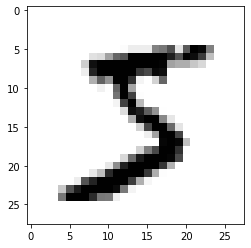

In [35]:
n = 0

plt.imshow(x[n].reshape(28, 28), cmap='binary')
print(y[n])
plt.show()

<h4>To better understand what classification models are about, we will start by testing a simple model called binary classifier.</h4>

<h4>A binary classifier is a machine learning model that aims to classify data into two distinct categories. This model receives input data and generates a binary output that represents the prediction for the category to which the data belongs. It is used in various applications, from sentiment analysis in texts to medical diagnosis. To train a binary classifier, it is necessary to use a dataset that already has the known categories so that the model can learn to perform the correct classification.</h4>

<h4>With that, we will begin by training a model to simply determine whether an image is or is not a certain number.</h4>

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

<h5>As an initial step, since we are using a binary classifier, I cannot use all classes of y. Therefore, we will choose 5 as an example for the model to identify whether it is a 5 or not. For this, we will separate only where y_train == 5.</h5>

In [40]:
y_train_5 = (y_train==5)

In [48]:
y_train_5

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [50]:
y_train_5 = y_train_5.ravel()
pd.Series(y_train_5).value_counts()

False    44620
True      4380
dtype: int64

In [51]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Class real:  False
Predict:  [False]


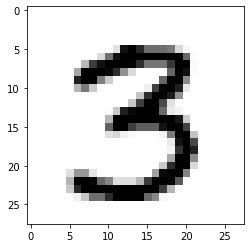

In [116]:
n = 9

plt.imshow(x_train[n].reshape(28, 28), cmap='binary')
print("Class real: ", y_train_5[n])
print("Predict: ", sgd_clf.predict([x_train[n]]))

In [138]:
#Checking in a simple way how many times the model gets it right and how many times it gets it wrong.

correct = 0
wrong = 0

for n in range(0, len(x_train)):
    if y_train_5[n] == sgd_clf.predict([x_train[n]])[0]:
        correct += 1
    else:
        wrong += 1
    
perc_corret = 100*(correct/(correct+wrong))
perc_wrong = 100*(wrong/(correct+wrong))
print("Correct predictions: " + str(correct))
print("Wrong predictions: " + str(wrong))
print("percentage of correct answers: {:.2f}%".format(perc_corret))
print("Percentage of wrong answers: {:.2f}%".format(perc_wrong))

Correct predictions: 45816
Wrong predictions: 3184
percentage of correct answers: 93.50%
Percentage of wrong answers: 6.50%


<h3>Validating the model with Cross Validation</h3>

In [136]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, x_train,y_train_5, cv=3, scoring='accuracy')

array([0.95885882, 0.96583604, 0.96595849])

<h5>The accuracy of this model is not necessarily good, as we have a very small portion of true cases in the data. The distribution of the number 5 within this data is only about 10%, with approximately 90% of the data representing other numbers. So when training the model, we have approximately 90% of the time when the image is not the number 5 that we are trying to identify here.</h5>

<h2>Metrics of classification</h2>

<p>The confusion matrix is a table used to evaluate the performance of a classification model. It shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) for each class.</p>

<p>Accuracy is a performance measure that indicates the percentage of examples that the model correctly classifies. It is calculated as the ratio of the total number of correctly classified examples to the total number of examples.</p>

<p>Recall is a performance measure that indicates the proportion of positive examples that the model correctly classified. It is calculated as the ratio of the number of true positives to the total number of positive examples.</p>

<p>F1Score is a performance measure that takes into account both precision and recall of the model. It is calculated as the harmonic mean between precision and recall, and is useful when the classes have unequal sizes or when there is a balance between precision and recall.</p>

<h4>Confusion Matrix</h4>

In [139]:
from sklearn.metrics import confusion_matrix

In [140]:
confusion_matrix(y_train_5, sgd_clf.predict(x_train))

array([[41843,  2777],
       [  407,  3973]], dtype=int64)

<h5>This confusion matrix represents the performance of a binary classification model that aims to predict whether an example belongs to the positive class (1) or the negative class (0).</h5>

<h5>The position (1,1) of the matrix represents the number of true negatives (TN), i.e., the amount of examples that were correctly classified as belonging to the negative class (0).</h5>
<h5>The position (2,2) of the matrix represents the number of true positives (TP), i.e., the amount of examples that were correctly classified as belonging to the positive class (1).</h5>
<h5>The position (1,2) of the matrix represents the number of false positives (FP), i.e., the amount of examples that were incorrectly classified as belonging to the positive class (1), but actually belonged to the negative class (0).</h5>
<h5>he position (2,1) of the matrix represents the number of false negatives (FN), i.e., the amount of examples that were incorrectly classified as belonging to the negative class (0), but actually belonged to the positive class (1).</h5>

<h4>Precision Score and Recall Score<h4>

In [141]:
from sklearn.metrics import precision_score, recall_score

y_train_pred = sgd_clf.predict(x_train)
print("Precision: ", precision_score(y_train_5, y_train_pred))
print("Recall: ", recall_score(y_train_5, y_train_pred))

Precision:  0.5885925925925926
Recall:  0.9070776255707762


In [142]:
from sklearn.metrics import classification_report

In [147]:
print("Confusion Matrix: \n", confusion_matrix(y_train_5, sgd_clf.predict(x_train)))
print()
print(classification_report(y_train_5, y_train_pred))

Confusion Matrix: 
 [[41843  2777]
 [  407  3973]]

              precision    recall  f1-score   support

       False       0.99      0.94      0.96     44620
        True       0.59      0.91      0.71      4380

    accuracy                           0.94     49000
   macro avg       0.79      0.92      0.84     49000
weighted avg       0.95      0.94      0.94     49000



<h2>Multiclass Classification Model</h2>

<p>A multiclass classification model is a type of machine learning model that aims to classify examples into three or more classes. Unlike binary models that aim to classify examples into two classes, a multiclass model can be used to classify examples into multiple different classes, such as classifying images into different categories like cats, dogs, and birds.</p>

In [154]:
#The ravel() method is used to transform a multidimensional array into a one-dimensional array.
y_train = y_train.ravel()

sgd_clf2 = SGDClassifier()
sgd_clf2.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Prediction:  [1.]


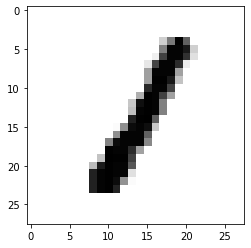

In [163]:
n = 7
digit = x_train[n]
print("Prediction: ", sgd_clf2.predict([digit]))
plt.imshow(digit.reshape(28,28), cmap='binary')

In [164]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)

In [172]:
conf_mx = confusion_matrix(y_train, y_train_pred)

print("Confusion Matrix: \n\n", conf_mx)
print()
print(classification_report(y_train, y_train_pred))

Confusion Matrix: 

 [[4620    0   23   13    9   26   20    6   76    7]
 [   0 5251   64   23   10   25   12   17   92   16]
 [  42   35 4318   89   50   37   53   81  171   12]
 [  22   21  245 3907   10  255   18   81  413   85]
 [  13    9   93    5 4251   39   43   53  129  174]
 [  60   17   36  189   94 3456   93   28  354   53]
 [  46   18   78    9   42  103 4421   12   71    0]
 [  28   15   73   22   76   15    2 4713   32  135]
 [  40   58  119  114   58  263   18   43 3987   77]
 [  26   19   46   48  264   86    1  322  218 3838]]

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      4800
         1.0       0.96      0.95      0.96      5510
         2.0       0.85      0.88      0.87      4888
         3.0       0.88      0.77      0.82      5057
         4.0       0.87      0.88      0.88      4809
         5.0       0.80      0.79      0.80      4380
         6.0       0.94      0.92      0.93      4800
         7.0  

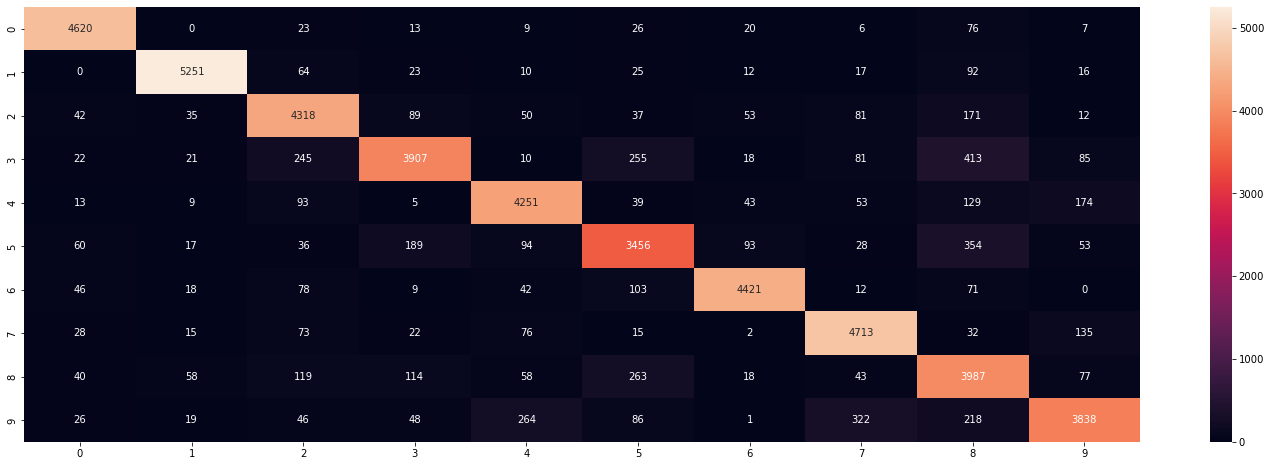

In [176]:
"""The code creates a figure with a heatmap from the confusion matrix conf_mx.
The parameter annot=True causes the values of the matrix to be displayed inside 
the cells of the heatmap, and the parameter fmt=".0f" sets the format of the values
as integers without decimal places. The figsize=(25,8) sets the size of the figure to
a width of 25 units and a height of 8 units. The seaborn library is used to plot the heatmap."""

fig, ax = plt.subplots(figsize=(25,8))
sns.heatmap(conf_mx, annot=True, fmt=".0f");

<h2>Multilabel Outputs</h2>

<p>Multilabel outputs are a type of machine learning model output where an example can be associated with more than one class. Instead of binary or multiclass classification where an example belongs to only one class, multilabel output can have multiple classes assigned to a single example. For instance, in a movie recommendation system, a user may like both action and comedy movies, meaning that these two classes can be assigned to them as a multilabel output. Multilabel classification is more challenging than binary or multiclass classification because it requires predicting multiple classes for each example, increasing the complexity of the model and the need for more data and computational resources.</p>

<p>In the following example, we will check if a handwritten number is greater than or equal to 7 and if it is odd.</p>

In [185]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [186]:
y_train_large

array([ True, False,  True, ..., False, False, False])

In [187]:
y_train_odd

array([ True, False,  True, ..., False,  True,  True])

In [188]:
y_multilabel

array([[ True,  True],
       [False, False],
       [ True,  True],
       ...,
       [False, False],
       [False,  True],
       [False,  True]])

In [189]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

               >= 7 |  Odd
Prediction:  [[ True  True]]


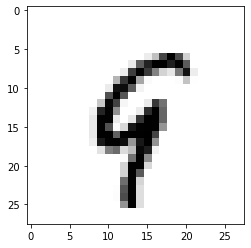

In [200]:
n = 11
digit = x_train[n]
print("               >= 7 |  Odd")
print("Prediction: ", knn_clf.predict([digit]))
plt.imshow(digit.reshape(28,28), cmap='binary')